We need to provide SSP2 data for 2081 - 2100.

We have SSP1 and SSP3.

The code is slightly different for the Northern region as there are too few fires to obtain the daily number of fires as an average of SSP1 and SSP3.

### We asume SSP2 is somewhere in the middle of SSP1 and SSP3

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import random

##### The daily count of fires is hence in between SSP1 and SSP3

We obtained a coefficient = 0.5 from the GCM temperature increase (see report)

In [142]:
folder = "ML-data-Northern-Europe-gridded"

In [143]:
path = "O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/"+ folder + "/results/climex/"

In [144]:
start_year = '2081'
end_year = '2100'
ens = 'etp'
mid_century = False
save = False

In [145]:
df_eop = pd.read_csv(path + 'eop/df_count.csv')

In [146]:
df_etp = pd.read_csv(path + 'etp/df_count.csv')

In [147]:
df_epp = pd.read_csv(path + 'epp/df_count.csv')

In [148]:
n_fires_etp = np.nansum(df_etp['count'])
print(n_fires_etp)

540.0


In [149]:
n_fires_eop = np.nansum(df_eop['count'])
print(n_fires_eop)

472.0


In [150]:
n_fires_epp = np.nansum(df_epp['count'])
print(n_fires_epp)

338.0


In [152]:
# For Northern we don't round the numbers as in South and Central
fires_ssp2_end = (df_eop['count'] + df_etp['count'])/2

In [153]:
n_fires_ssp2_end = np.nansum(fires_ssp2_end)

In [154]:
n_fires_ssp2_end 

506.0

In [155]:
T_ssp2 = 280.6 # Temperatures from GCM 
T_hist = 278.7 # Temperatures from GCM 
T_x = 279.9 # Temperatures from GCM 
n_fires_ssp2_mid = n_fires_epp + (n_fires_ssp2_end - n_fires_epp)/(T_ssp2 - T_hist)*(T_x - T_hist)
print(n_fires_ssp2_mid)

444.10526315789184


In [156]:
factor = n_fires_ssp2_mid/n_fires_ssp2_end

In [157]:
factor

0.8776783856875333

In [158]:
fires_ssp2_mid = (df_eop['count'] + df_etp['count'])/2 * factor 

In [159]:
 print(np.nansum(fires_ssp2_mid))

444.10526315789184


In [160]:
dates = df_etp['Unnamed: 0'].values

In [161]:
df_count = pd.DataFrame(index = dates)

In [162]:
df_count['count'] = df_etp['count'].values

In [164]:
# For Northern, we remove fires from the SSP3 simulation to obtain the required number
if mid_century == True:
    while df_count['count'].sum() > int(np.nansum(fires_ssp2_mid)):
        integer = random.randint(0, len(df_count)) # Date to remove fires from 
        df_count.iloc[integer, 0] = 0
else:
    while df_count['count'].sum() > int(np.nansum(fires_ssp2_end)):
        integer = random.randint(0, len(df_count)) # Date to remove fires from 
        df_count.iloc[integer, 0] = 0

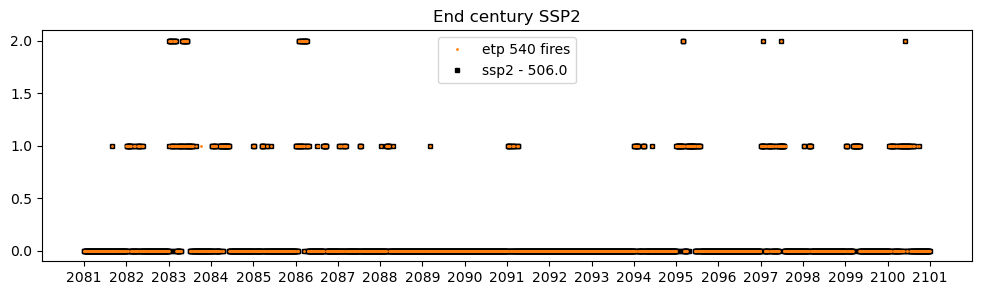

In [165]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(df_etp['count'], '.', label = 'etp '+ str(int(sum(df_etp['count']))) + ' fires', ms = 2, zorder =10, c = 'tab:orange')
ax.plot(df_count['count'], 's', label = 'ssp2 - ' + str(np.nansum(df_count['count'])), c = 'k', ms = 3)
ax.set_xticks(np.arange(0, len(df_etp)+1, 153))
ax.set_xticklabels(np.arange(2081, 2102, 1))
ax.legend()
if mid_century == True:
    ax.set_title('Mid century SSP2')
else:
    ax.set_title('End century SSP2')
    

### Find location

We select the location based on the SSP3 scenario simulation

In [168]:
select_type = 'thresh' # or dice 

In [169]:
start_year = '2081'
end_year = '2100'


In [170]:
# Fire probability
ens = 'etp'
df_probs = pd.read_csv(path + '/'+ ens + '/daily_probas_' + start_year + '-' + end_year + '_fire-season.csv')


In [171]:
df_probs = df_probs.set_index(np.int64(df_probs.id))


In [172]:
df_probs= df_probs.iloc[:, 1:]


In [173]:
df_probs = df_probs.drop(columns = 'mean')

In [174]:
df_probs

,2081-06-01,2081-06-02,2081-06-03,2081-06-04,2081-06-05,2081-06-06,2081-06-07,2081-06-08,2081-06-09,2081-06-10,...,2100-10-22,2100-10-23,2100-10-24,2100-10-25,2100-10-26,2100-10-27,2100-10-28,2100-10-29,2100-10-30,2100-10-31
199,0.166667,0.180000,0.166667,0.093333,0.100000,0.106667,0.113333,0.100000,0.086667,0.093333,...,0.240000,0.233333,0.220000,0.253333,0.233333,0.246667,0.306667,0.273333,0.246667,0.373333
200,0.140000,0.146667,0.153333,0.120000,0.126667,0.113333,0.106667,0.100000,0.106667,0.113333,...,0.293333,0.300000,0.273333,0.280000,0.273333,0.300000,0.340000,0.333333,0.266667,0.433333
202,0.133333,0.140000,0.160000,0.080000,0.073333,0.073333,0.106667,0.086667,0.080000,0.053333,...,0.313333,0.293333,0.240000,0.260000,0.260000,0.300000,0.353333,0.340000,0.300000,0.300000
203,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,...,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667
204,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,...,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119531,0.886667,0.840000,0.700000,0.653333,0.600000,0.473333,0.580000,0.296667,0.460000,0.160000,...,0.280000,0.280000,0.293333,0.323333,0.293333,0.323333,0.300000,0.323333,0.280000,0.253333
119532,0.866667,0.746667,0.886667,0.573333,0.453333,0.433333,0.646667,0.366667,0.566667,0.146667,...,0.280000,0.246667,0.293333,0.296667,0.290000,0.290000,0.283333,0.296667,0.266667,0.233333
119533,0.853333,0.753333,0.693333,0.626667,0.453333,0.433333,0.513333,0.333333,0.526667,0.173333,...,0.286667,0.266667,0.296667,0.303333,0.296667,0.303333,0.290000,0.303333,0.286667,0.253333
119534,0.880000,0.820000,0.780000,0.633333,0.566667,0.506667,0.646667,0.370000,0.526667,0.260000,...,0.306667,0.286667,0.316667,0.310000,0.310000,0.316667,0.303333,0.316667,0.313333,0.273333


In [175]:
# Update column names to date times 
dates = pd.date_range(start_year + '-01-07', end_year + '-12-24')

# Only fire season so months outside fire season are filtered out 
for m in [1, 2, 3, 4, 5, 11, 12]:
    dates = dates[ ~(dates.month == m)]

df_probs = df_probs.set_axis(dates, axis=1)

In [176]:
df_probs

,2081-06-01,2081-06-02,2081-06-03,2081-06-04,2081-06-05,2081-06-06,2081-06-07,2081-06-08,2081-06-09,2081-06-10,...,2100-10-22,2100-10-23,2100-10-24,2100-10-25,2100-10-26,2100-10-27,2100-10-28,2100-10-29,2100-10-30,2100-10-31
199,0.166667,0.180000,0.166667,0.093333,0.100000,0.106667,0.113333,0.100000,0.086667,0.093333,...,0.240000,0.233333,0.220000,0.253333,0.233333,0.246667,0.306667,0.273333,0.246667,0.373333
200,0.140000,0.146667,0.153333,0.120000,0.126667,0.113333,0.106667,0.100000,0.106667,0.113333,...,0.293333,0.300000,0.273333,0.280000,0.273333,0.300000,0.340000,0.333333,0.266667,0.433333
202,0.133333,0.140000,0.160000,0.080000,0.073333,0.073333,0.106667,0.086667,0.080000,0.053333,...,0.313333,0.293333,0.240000,0.260000,0.260000,0.300000,0.353333,0.340000,0.300000,0.300000
203,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,...,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667,0.546667
204,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,...,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667,0.386667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119531,0.886667,0.840000,0.700000,0.653333,0.600000,0.473333,0.580000,0.296667,0.460000,0.160000,...,0.280000,0.280000,0.293333,0.323333,0.293333,0.323333,0.300000,0.323333,0.280000,0.253333
119532,0.866667,0.746667,0.886667,0.573333,0.453333,0.433333,0.646667,0.366667,0.566667,0.146667,...,0.280000,0.246667,0.293333,0.296667,0.290000,0.290000,0.283333,0.296667,0.266667,0.233333
119533,0.853333,0.753333,0.693333,0.626667,0.453333,0.433333,0.513333,0.333333,0.526667,0.173333,...,0.286667,0.266667,0.296667,0.303333,0.296667,0.303333,0.290000,0.303333,0.286667,0.253333
119534,0.880000,0.820000,0.780000,0.633333,0.566667,0.506667,0.646667,0.370000,0.526667,0.260000,...,0.306667,0.286667,0.316667,0.310000,0.310000,0.316667,0.303333,0.316667,0.313333,0.273333


In [116]:
#df_probs['id'] = df_probs.index

In [177]:
select_type = 'thresh' # or dice 

In [178]:
df_probs['id'] = df_probs.index

In [179]:
years = np.arange(int(start_year), int(end_year)+1, 1)
prob = 0.7 # select threshold value

In [180]:
df_ignition = pd.DataFrame(columns = ['date', 'id'])

i = 0
for year in years: 
    year = str(year)
    df = df_probs.filter(like= year)
    
    for column_name, item in df.items():
        
        # Random probability
        vals = np.zeros(len(item))
        random_probas = np.random.rand(len(item))

        # Use sample function to select ids based on condition
        if select_type == 'thresh':
            indices = df_probs['id'][item > prob].sample(int(np.round(df_count['count'][i],0)))
        elif select_type == 'dice':
            indices = df_probs['id'][item > random_probas].sample(int(np.round(df_count['count'][i],0)))

        # Create a dataframe with a row per fire 
        for ind in indices:
            df_temp = pd.DataFrame({"date":[str(column_name)[:10]], "id": [ind]})
            df_ignition = pd.concat([df_ignition, df_temp], ignore_index=True)
            
        i = i +1        

C:\Users\ophme\AppData\Local\Temp\ipykernel_42156\3848645691.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indices = df_probs['id'][item > prob].sample(int(np.round(df_count['count'][i],0)))


In [181]:
df_ignition

,date,id
0,2081-09-11,39536
1,2082-06-02,116727
2,2082-06-03,53900
3,2082-06-04,47141
4,2082-06-06,118945
...,...,...
501,2100-09-01,38373
502,2100-09-02,40686
503,2100-09-03,114745
504,2100-09-04,52335


#### Assign geometry to corresponding id

In [182]:
grid = gpd.read_file("O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/"+ folder +"/grid/europe_10km_grid.shp")

In [183]:
grid = grid[['id', 'geometry']].to_crs(4326)

In [184]:
grid['id'] = grid['id'].astype('int')

In [185]:
grid = grid.set_index('id')

In [186]:
geometries = []
for i, row in df_ignition.iterrows():
    geometries.append(grid.loc[row.id, 'geometry'])

In [187]:
df_ignition['geometry'] = geometries

#### Convert to geopandas and sample point randomly within grid 

In [188]:
df_ignition_gpd = gpd.GeoDataFrame(df_ignition, geometry=df_ignition["geometry"])

In [189]:
df_ignition_gpd['sample_point'] = df_ignition_gpd.geometry.sample_points(1)

In [190]:
df_ignition['lon'] = df_ignition_gpd.sample_point.x
df_ignition['lat'] = df_ignition_gpd.sample_point.y

In [191]:
df_ignition

,date,id,geometry,lon,lat
0,2081-09-11,39536,"POLYGON ((16.5268307450926 63.1243628559109, 1...",16.415614,63.105750
1,2082-06-02,116727,POLYGON ((19.293547865442893 63.70849866995484...,19.233855,63.698824
2,2082-06-03,53900,"POLYGON ((29.51769723741128 63.86060985796274,...",29.342519,63.843703
3,2082-06-04,47141,"POLYGON ((25.27881752121746 67.20736687717341,...",25.210371,67.172429
4,2082-06-06,118945,"POLYGON ((25.04685002102077 55.62481800255893,...",24.986162,55.592318
...,...,...,...,...,...
501,2100-09-01,38373,POLYGON ((15.594475768044058 63.43258138591236...,15.412258,63.388399
502,2100-09-02,40686,POLYGON ((17.741474588286945 63.97492576542764...,17.590500,63.901787
503,2100-09-03,114745,POLYGON ((-0.6606464168469639 51.3536025022244...,-0.729412,51.264224
504,2100-09-04,52335,"POLYGON ((25.37954893201933 58.88992456521223,...",25.196182,58.823591


#### Save list of points

In [192]:
path = "O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/"+ folder + "/"

In [134]:
if mid_century == True:
    start_year = 2041
    end_year = 2060

In [135]:
if save == True:
    df_ignition.drop(columns = ['id', 'geometry']).to_csv(path + 'results/ignition-selection/fire-season-ignition-points-' + str(start_year) + '-' + str(end_year) + '-' + select_type + '07_climex_' + ens +  '_ssp2.csv')

### 4. Visualise results 

#### Groupd by id and counter the number of fires per id

In [193]:
new_data = df_ignition.groupby('id').size().reset_index(name='count')
len(new_data)

486

In [194]:
for i, row in new_data.iterrows():
    new_data.loc[i, 'geometry'] = grid.loc[row.id, :].geometry



In [195]:
new_data = gpd.GeoDataFrame(new_data, geometry=new_data["geometry"])


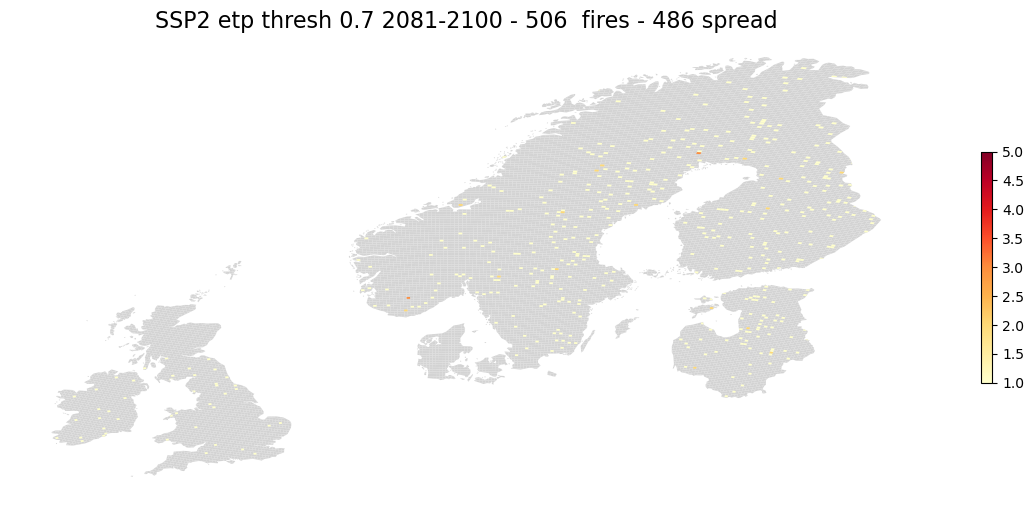

In [196]:
fig, ax = plt.subplots(figsize = (15, 6))
grid.plot(color = 'lightgrey', ax = ax, zorder = 0)
new_data.plot('count', ax = ax, cmap = 'YlOrRd', legend = True, vmin = 1, vmax = 5, legend_kwds={
        "shrink":.5   },)
#fires.plot(ax = ax,  color = 'k', zorder = 10)
if select_type == 'dice':
    ax.set_title(select_type, fontsize = 12)
else:
   ax.set_title('SSP2 ' + ens + ' ' + select_type + ' ' + str(prob) +' ' + str(start_year) + '-' + str(end_year) + ' - ' + str(len(df_ignition)) + '  fires - ' + str(len(new_data)) + ' spread' , fontsize = 16)
#
ax.set_axis_off()